In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Joined

In [2]:
joined = pd.read_csv('joined.csv')

/tmp/ipykernel_15272/1891019688.py:1: DtypeWarning: Columns (28,29,30,49,51,54,55,56,57,59,60,61,62,63,65,66,67,71,72,73,74,75,76,78,79,80,81,82,83,84,85,87,88,89,91,92,93,94,96,98,99,100,102,103,104,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,135,136,137,138,139,140,141,142,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,162,163,164,166,167,168,169,170,171,172,173,174,175,176,177,179,180,182,183,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269) have mixed types. Specify dtype option on import or set low_memory=False.
  joined = pd.read_csv('joined.csv')


Text(0.5, 1.0, 'densidad de NAs por columna')

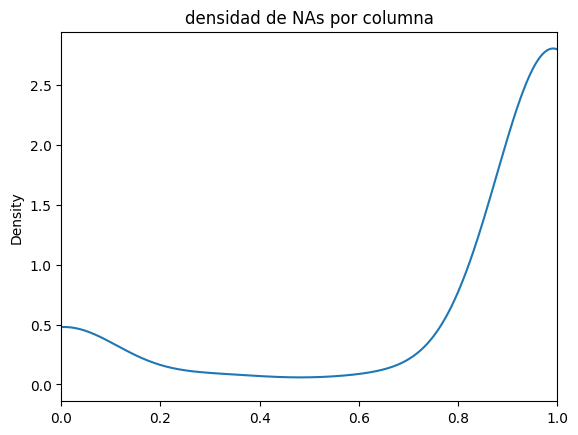

In [3]:
joined.isna().mean().plot.density()
plt.xlim(0, 1)
plt.title('densidad de NAs por columna')

In [4]:
joined.apply(lambda col: col.str.contains('control'), axis=1).mean(skipna=False).sort_values(ascending=False)

jattr             0.023563
attributes        0.023563
primary_search    0.003548
sample_name       0.003457
librarysource          0.0
                    ...   
Identifiers            NaN
Organism               NaN
Attributes             NaN
Accession              NaN
ID                     NaN
Length: 276, dtype: object

In [5]:
joined.sample_title_sam.unique()

array(['Internodes of soybean, sampling 1',
       'Internodes of soybean, sampling 2',
       'Internodes of soybean, sampling 3',
       'Roots of soybean, sampling 1', 'Roots of soybean, sampling 2',
       'Roots of soybean, sampling 3', 'Glycine max RNA-Seq', nan,
       'thinning_20160916_rep1', 'control_20160916_rep1',
       'thinning_20160916_rep2', 'control_20160916_rep2',
       'thinning_20160930_rep1', 'control_20160930_rep1',
       'thinning_20160930_rep2', 'control_20160930_rep2'], dtype=object)

In [6]:
joined.apply(lambda col: col.str.contains('drought'), axis=1).mean(skipna=False).sort_values(ascending=False)

jattr             0.004003
attributes        0.004003
primary_search    0.000364
sample_name       0.000364
librarysource          0.0
                    ...   
Identifiers            NaN
Organism               NaN
Attributes             NaN
Accession              NaN
ID                     NaN
Length: 276, dtype: object

In [7]:
joined['isolation_source_sam'].unique()

array([nan, 'missing', 'LN', 'HN', 'LNLP', 'not applicable',
       'not collected', 'field cultivation', 'plant',
       'Mixture of SMV strains SC1 and SC3', 'not provided', 'leaf',
       'drought', 'Well-watered', 'Palnt pathology, PDKV Akola'],
      dtype=object)

Quiero hacer esto para toda columna, con palabras clave

In [8]:
def cols_match(row, pat):
    row
    return row[row.astype(str).str.contains(pat, regex=False, case=False).fillna(False)].index.to_list()

In [9]:
kws = ['control', 'stress', 'drought', 'bacteria', 'inoculated', 'flood', 'deficit', 'infest', 'pathogen', 'acid', 'fungal', 'sporus']


In [10]:
stresses = pd.DataFrame(joined['biosample'])
for kw in kws:
    stresses[kw] = joined.apply(lambda row: cols_match(row, kw), axis=1)
stresses = stresses.set_index('biosample')
stresses.to_csv('stresses.csv')

In [11]:
stresses_len = stresses.map(len)
stresses_len

,control,stress,drought,bacteria,inoculated,flood,deficit,infest,pathogen,acid,fungal
biosample,,,,,,,,,,,
SAMD00025071,0,0,0,0,0,0,0,0,0,0,0
SAMD00025072,0,0,0,0,0,0,0,0,0,0,0
SAMD00025073,0,0,0,0,0,0,0,0,0,0,0
SAMD00025074,0,0,0,0,0,0,0,0,0,0,0
SAMD00025075,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
SAMN41829221,0,0,0,0,0,0,0,0,0,0,0
SAMN41829222,0,0,0,0,0,0,0,0,0,0,0
SAMN41829223,0,0,0,0,0,0,0,0,0,0,0


In [12]:
stresses_len.where(stresses_len == 0).isna().sum()

control       441
stress        485
drought        84
bacteria        0
inoculated    339
flood           0
deficit       135
infest        141
pathogen        3
acid           79
fungal         12
dtype: int64

# Guido / Maxi

In [13]:
stress_guido = pd.DataFrame({
    'con': (stresses_len['control'] != 0) & (stresses_len['stress'] == 0),
    'stress': (stresses_len['stress'] != 0) & (stresses_len['control'] == 0)
}, index=stresses_len.index)
stress_guido.sum()

con       409
stress    453
dtype: int64

In [14]:
stress_guido.loc[~(stress_guido['con'] | stress_guido['stress'])] = pd.NA

/tmp/ipykernel_97361/2688413663.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  stress_guido.loc[~(stress_guido['con'] | stress_guido['stress'])] = pd.NA


In [15]:
stress_maxi = pd.read_csv('stress_control_maxi.csv')
stress_maxi.loc[stress_maxi['Control/Treated'] == 'con', 'Control/Treated'] = True
stress_maxi.loc[stress_maxi['Control/Treated'] == 'stress', 'Control/Treated'] = False

In [16]:
stress_maxi.columns = ['con', 'biosample']
stress_maxi

,con,biosample
0,True,SAMN31521702
1,True,SAMN31521701
2,True,SAMN31521700
3,True,SAMN31521699
4,True,SAMN31521748
...,...,...
12851,NaN,SAMN41088855
12852,NaN,SAMN41088854
12853,NaN,SAMN41088853
12854,NaN,SAMN41088852


In [17]:
stress_maxi = stress_maxi.drop_duplicates(keep='first', subset='biosample').set_index('biosample')
stress_maxi

,con
biosample,
SAMN31521702,True
SAMN31521701,True
SAMN31521700,True
SAMN31521699,True
SAMN31521748,True
...,...
SAMN41088855,NaN
SAMN41088854,NaN
SAMN41088853,NaN


In [21]:
stress_gm = stress_guido.join(stress_maxi, rsuffix='_maxi', how='outer')[['con', 'con_maxi']]
stress_gm.columns = ['guido', 'maxi']
stress_gm

,guido,maxi
biosample,,
SAMD00025071,NaN,NaN
SAMD00025072,NaN,NaN
SAMD00025073,NaN,NaN
SAMD00025074,NaN,NaN
SAMD00025075,NaN,NaN
...,...,...
SAMN41829221,NaN,NaN
SAMN41829222,NaN,NaN
SAMN41829223,NaN,NaN


In [22]:
stress_gm.index.duplicated().sum()

0

In [23]:
stress_gm.to_csv('stress_control.csv')